# Verification and analysis of distance scores

In [2]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

os.chdir("c:/Users/Raya/OneDrive/Documents/3-CSAI/CSAI-Y3-S2/Thesis/csai-thesis")

# Import the config module
config_dir = 'scripts/computations'
sys.path.append(config_dir)
import config

In [6]:
# Constants & configurations

configs = config.Experiment()
dist_file = os.path.join(configs.dist_scores_dir, configs.pairwise_dist_scores_filename)

plt.style.use('ggplot')

In [7]:
dist_df = pd.read_csv(dist_file)

print("Dataframe head:")
display(dist_df.head())

print("Dataframe information:")
display(dist_df.info())

print("Descriptive statistics:")
display(dist_df.describe())

Dataframe head:


,word_length,word1,word2,cos_dist_raw,cos_dist_norm,cos_dist_abs,cos_dist_ang,form_dist_edit,form_dist_edit_norm,form_dist_jaccard
0,3,cup,art,0.996087,0.498043,0.996087,0.498754,3,1.0,1.000000
1,3,cup,jpg,1.001388,0.500694,0.998612,0.500442,3,1.0,0.888889
2,3,cup,men,0.993896,0.496948,0.993896,0.498057,3,1.0,1.000000
3,3,cup,law,1.001555,0.500777,0.998445,0.500495,3,1.0,1.000000
4,3,cup,you,1.007661,0.503831,0.992339,0.502439,3,1.0,0.888889


Dataframe information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154175 entries, 0 to 1154174
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   word_length          1154175 non-null  int64  
 1   word1                1154175 non-null  object 
 2   word2                1154175 non-null  object 
 3   cos_dist_raw         1154175 non-null  float64
 4   cos_dist_norm        1154175 non-null  float64
 5   cos_dist_abs         1154175 non-null  float64
 6   cos_dist_ang         1154175 non-null  float64
 7   form_dist_edit       1154175 non-null  int64  
 8   form_dist_edit_norm  1154175 non-null  float64
 9   form_dist_jaccard    1154175 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 88.1+ MB


None

Descriptive statistics:


,word_length,cos_dist_raw,cos_dist_norm,cos_dist_abs,cos_dist_ang,form_dist_edit,form_dist_edit_norm,form_dist_jaccard
count,1.154175e+06,1.154175e+06,1.154175e+06,1.154175e+06,1.154175e+06,1.154175e+06,1.154175e+06,1.154175e+06
mean,5.665564e+00,9.839016e-01,4.919508e-01,9.593024e-01,4.947572e-01,5.091633e+00,9.000839e-01,8.954784e-01
std,1.107450e+00,7.517328e-02,3.758664e-02,6.522178e-02,2.478026e-02,1.215520e+00,1.323110e-01,8.112805e-02
min,3.000000e+00,2.160903e-03,1.080451e-03,2.160903e-03,2.092960e-02,1.000000e+00,1.428571e-01,1.538462e-01
25%,5.000000e+00,9.734060e-01,4.867030e-01,9.550852e-01,4.915339e-01,4.000000e+00,8.333333e-01,8.571429e-01
50%,6.000000e+00,9.989150e-01,4.994575e-01,9.783658e-01,4.996546e-01,5.000000e+00,1.000000e+00,9.090909e-01
75%,7.000000e+00,1.018159e+00,5.090796e-01,9.909977e-01,5.057806e-01,6.000000e+00,1.000000e+00,9.473684e-01
max,7.000000e+00,1.410348e+00,7.051742e-01,1.000000e+00,6.345929e-01,7.000000e+00,1.000000e+00,1.000000e+00


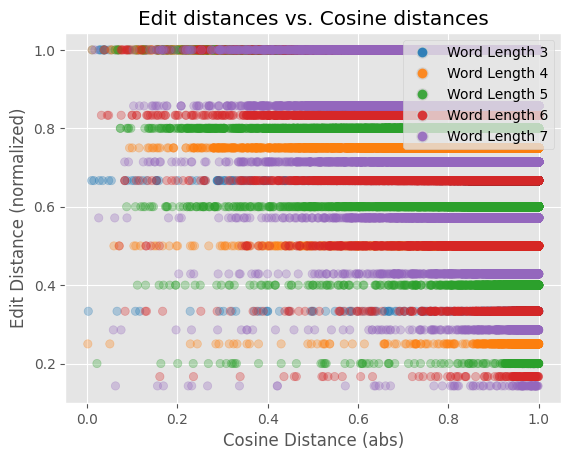

In [39]:
# Plot form distances against cosine distances

# word lengths -> colors
# 1 plot with cos dist abs and edit dist raw

log_cos_dist = False

# Define a color map to use for different word lengths
cmap = plt.get_cmap('tab10')  
# Map each word length to a color index in the color map
word_length_colors = {wl: cmap(i) for i, wl in enumerate(configs.word_lengths)}
    
# Extract absolute-value cosine distances ('abs') and raw edit distances
cos_dist_abs = dist_df['cos_dist_abs']
edit_dist_raw =  dist_df['form_dist_edit_norm']
word_lengths = dist_df['word_length']

# Create a list of colors based on the word length using the color map
colors = [word_length_colors[wl] for wl in word_lengths]

# Plot the data in the corresponding subplot
plt.scatter(cos_dist_abs, edit_dist_raw, c=colors, alpha=0.3)

# If specified, set the x-axis to a logarithmic scale
if log_cos_dist:
    plt.set_xscale('log')

# Add labels
plt.xlabel('Cosine Distance (abs)')
plt.ylabel('Edit Distance (normalized)')
plt.title('Edit distances vs. Cosine distances')
plt.grid(True)

# Add a legend for word lengths
handles = [plt.Line2D([0], [0], marker='o', color='lightgrey', label=f'Word Length {wl}', markerfacecolor=color, markersize=8, linestyle='None', alpha=0.9) for wl, color in word_length_colors.items()]
plt.legend(handles=handles, loc='upper right')

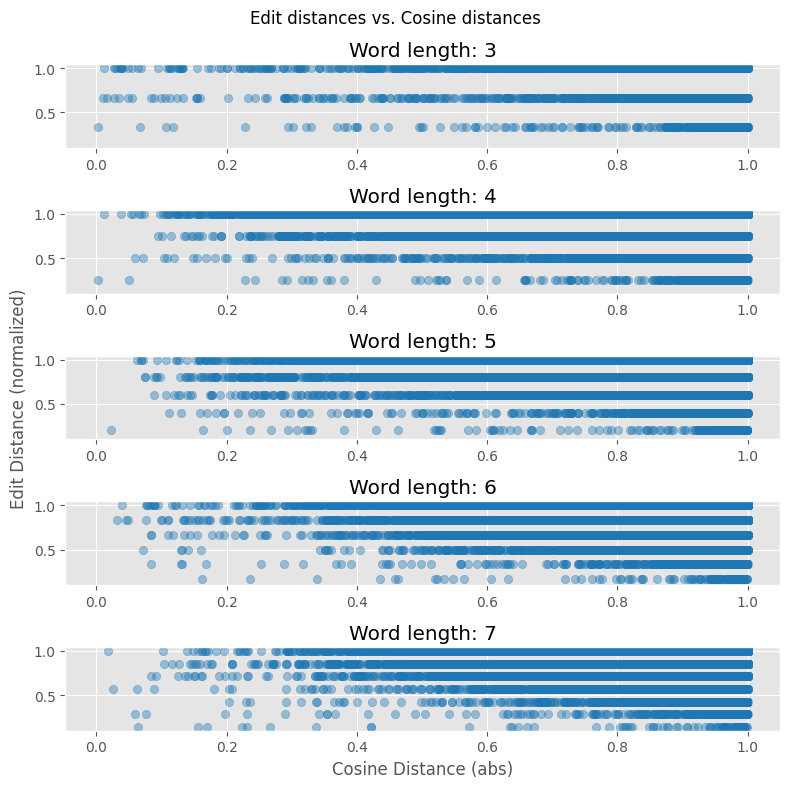

In [43]:
# The same but split into subplots for different word lengths

# Define the number of subplots based on the unique word lengths
unique_word_lengths = sorted(set(word_lengths))
num_subplots = len(unique_word_lengths)

# Create subplots
fig, axes = plt.subplots(nrows=num_subplots, ncols=1, figsize=(8, 8), sharex=True, sharey=True)

# Plot each word length category in a separate subplot
for i, wl in enumerate(unique_word_lengths):
    ax = axes[i]
    # Filter data for the current word length
    data_subset = dist_df[dist_df['word_length'] == wl]
    # Extract data for current word length
    cos_dist_abs_subset = data_subset['cos_dist_abs']
    edit_dist_raw_subset = data_subset['form_dist_edit_norm']
    # Plot the data
    ax.scatter(cos_dist_abs_subset, edit_dist_raw_subset, c='tab:blue', alpha=0.4)
    ax.set_title(f'Word length: {wl}')
    # Add grid and y-label
    ax.grid(True)
    if i == 2:
        ax.set_ylabel('Edit Distance (normalized)')
    ax.tick_params(axis='x', labelbottom=True)

# Set common labels and title
fig.suptitle('Edit distances vs. Cosine distances')
plt.xlabel('Cosine Distance (abs)')

# If specified, set the x-axis to a logarithmic scale
if log_cos_dist:
    axes[-1].set_xscale('log')

plt.tight_layout()
plt.show()


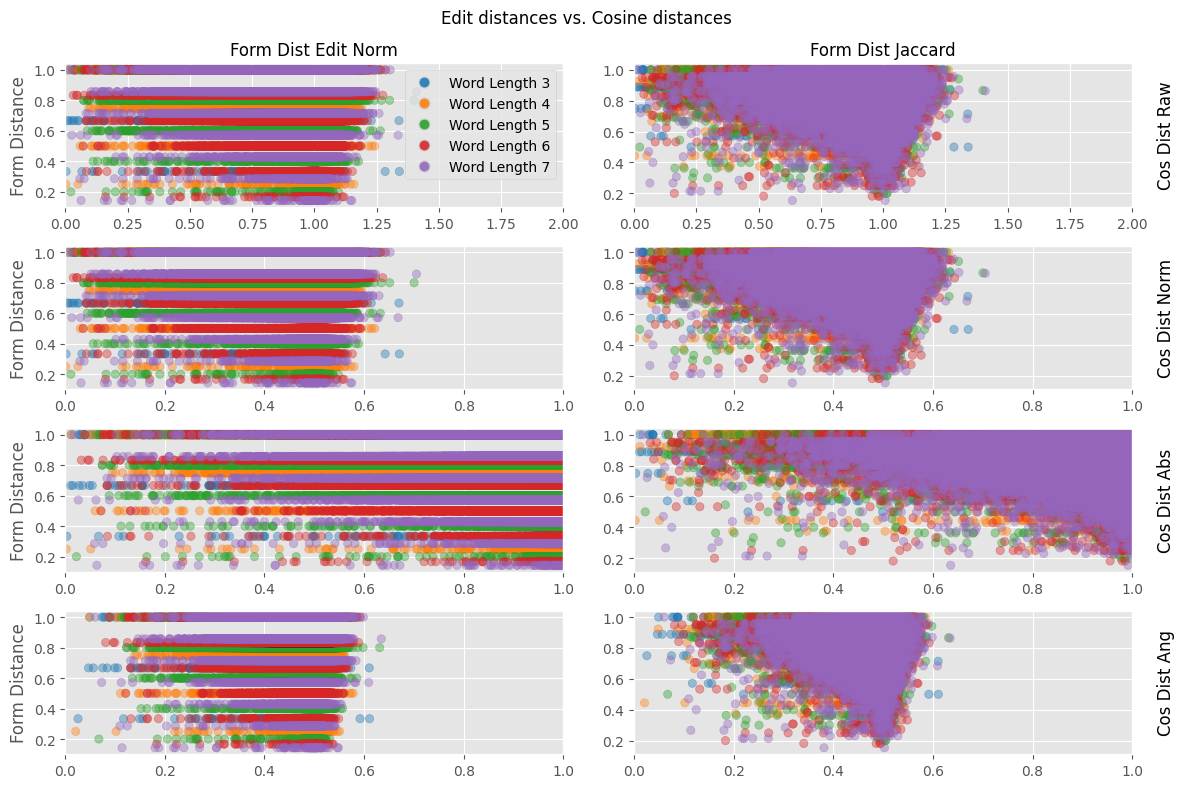

<Figure size 640x480 with 0 Axes>

In [10]:
log_cos_dist = False

# Define a color map to use for different word lengths
cmap = plt.get_cmap('tab10')  
# Map each word length to a color index in the color map
word_length_colors = {wl: cmap(i) for i, wl in enumerate(configs.word_lengths)}

# Unique cosine distance and form distance types
unique_cos_dist_types = [col for col in dist_df.columns if 'cos_dist' in col]
unique_form_dist_types = ['form_dist_edit_norm', 'form_dist_jaccard'] 

# Create a grid of plots
num_rows = len(unique_cos_dist_types)
num_cols = len(unique_form_dist_types)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 8))

# Iterate over each combination of cosine distance and form distance types
for i, cos_dist_type in enumerate(unique_cos_dist_types):
    for j, form_dist_type in enumerate(unique_form_dist_types):
        ax = axes[i, j]
        # Extract data
        cos_dist = dist_df[cos_dist_type]
        form_dist = dist_df[form_dist_type]
        word_lengths = dist_df['word_length']
        # Create a list of colors based on the word length using the color map
        colors = [word_length_colors[wl] for wl in word_lengths]
        # Plot the data
        ax.scatter(cos_dist, form_dist, c=colors, alpha=0.4)
        if 'raw' in cos_dist_type:
            ax.set_xlim(0, 2)
        else:
            ax.set_xlim(0, 1)
        # Add legend for word lengths in the first subplot
        if i == j == 0:
            handles = [plt.Line2D([0], [0], marker='o', color='lightgrey', label=f'Word Length {wl}', markerfacecolor=color, markersize=8, linestyle='None', alpha=0.9) for wl, color in word_length_colors.items()]
            ax.legend(handles=handles, loc='upper right')
        
        # Add row and column labels
        # if i == 0:
        #     ax.set_title(form_dist_type, fontsize=12, fontweight='normal', color='black')
        # if j == 0:
        #     ax.set_ylabel(cos_dist_type, fontsize=12, fontweight='normal', color='black')
        # ax.set_xlabel("Cosine Distance")
        
        if i == 0:
            ax.set_title(f'{form_dist_type.replace("_", " ").title()}', fontsize=12, color='black')
        if j == 0:
            ax.set_ylabel('Form Distance', fontsize=12)
        elif j == 1:
            # Add the type of cosine distance on the right side of the subplot
            ax.text(1.05, 0.5, cos_dist_type.replace("_", " ").title(), ha='left', va='center', rotation=90, fontsize=12, color='black', transform=ax.transAxes)
        # Add grid
        ax.grid(True)

# Set common title
fig.suptitle('Edit distances vs. Cosine distances')

# If specified, set the x-axis to a logarithmic scale
if log_cos_dist:
    for ax in axes.flat:
        ax.set_xscale('log')


plt.tight_layout()
plt.show()
plt.savefig(os.path.join('results', 'plots', 'scatter_pairwise_dist.pdf'))